<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 7.2: Data Exploration II (Multivariate Data)

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

Manatees are large, gentle sea creatures that live along the Florida coast. Many manatees are killed or injured by powerboats. The data on powerboat registrations (in thousands) and the number of manatees killed by boats in Florida in the years 1977 to 1990 is given below:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Lab7iiQ1.csv")
df

,Year,Powerboat Registration,Manatees Killed
0,1977,447,13
1,1978,460,21
2,1979,481,24
3,1980,498,16
4,1981,513,24
5,1982,512,20
6,1983,526,15
7,1984,559,34
8,1985,585,33
9,1986,614,33


a) Draw a relevant scatterplot of these data.

<AxesSubplot:xlabel='Year', ylabel='Manatees Killed'>

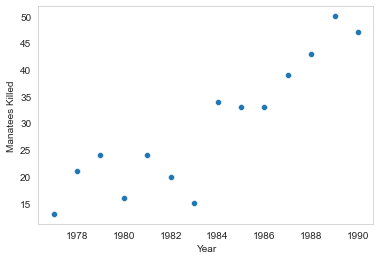

In [2]:
#your solution
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(x='Year', y='Manatees Killed', data=df)

b) Find the correlation between number of powerboat registration and number of manatees killed. Conclude your findings.

In [3]:
#your solution
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Powerboat Registration'], df['Manatees Killed'])
pearson_coef, p_value

(0.9414772887893057, 5.109061143429946e-07)

c) Describe your findings from (a) and (b).

    As the number of powerboat registrations increases, the number of manatees killed 
    increases


d) Plot a regression line for on the scatterplot.

<AxesSubplot:xlabel='Powerboat Registration', ylabel='Manatees Killed'>

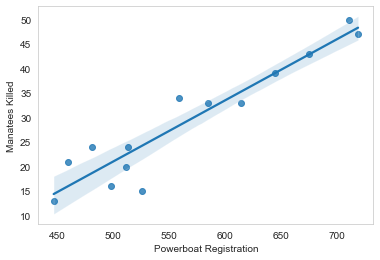

In [4]:
#your solution
sns.regplot(x='Powerboat Registration', y='Manatees Killed', data=df)

e) Create a pairplot for the data given.

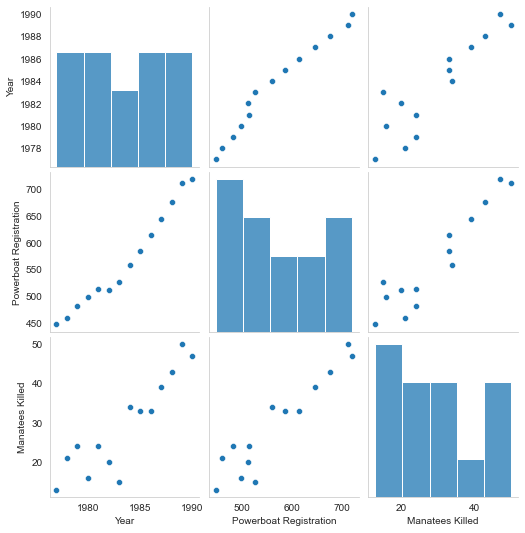

In [5]:
#your solution
sns.pairplot(df)

## Q2

In this question, we will use the World Happiness Report, which is a survey about the state of global happiness. The data is imported as follows:

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('Lab7iiQ2.csv', index_col=0)
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Below is a short description of what each column means:
<ul>
<li><strong>Happiness Score:&nbsp;</strong>A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."</li>
<li><strong>Economy (GDP per Capita):&nbsp;</strong>The extent to which GDP contributes to the calculation of the Happiness Score.</li>
<li><strong>Family:&nbsp;</strong>The extent to which Family contributes to the calculation of the Happiness Score</li>
<li><strong>Health (Life Expectancy):&nbsp;</strong>The extent to which Life expectancy contributed to the calculation of the Happiness Score</li>
<li><strong>Freedom:&nbsp;</strong>The extent to which Freedom contributed to the calculation of the Happiness Score.</li>
<li><strong>Trust (Government Corruption):&nbsp;</strong>The extent to which Perception of Corruption contributes to Happiness Score.</li>
<li>
<div class="sc-kMZwpj dFFZuK"><strong><span class="sc-fznzOf sc-fznMnq sc-jRYQbI hmtEvs">Generosity:&nbsp;</span></strong><span class="sc-fznzOf sc-fznMnq sc-jRYQbI hmtEvs">The extent to which Generosity contributed to the calculation of the Happiness Score.</span></div>
</li>
</ul>

a) Perform relevant EDA to answer the following question:

Which of the six variables ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity'] most affect a country’s “happiness”? Justify your answer.

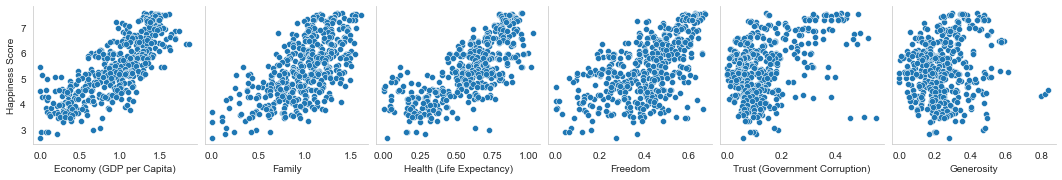

In [7]:
#your solution
sns.pairplot(data=data,y_vars=['Happiness Score'],x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'])

In [8]:
# Econimic seems to affect a country's happiness the most. This is as
#it has the closest resemblence to a straight line

b) Find each factor's correlation with the overall happiness score. Store the data in a dataframe.

In [9]:
#your solution
dict = {'factor' : [] ,'pearson_coef' : []}
lst = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
for i in lst:
    pearson_coef, p_value = stats.pearsonr(data.loc[data['Happiness Score'].notnull(), i], data.loc[data['Happiness Score'].notnull(), 'Happiness Score'])
    dict['factor'].append(i)
    dict['pearson_coef'].append(pearson_coef)
d = pd.DataFrame(dict)
d

,factor,pearson_coef
0,Economy (GDP per Capita),0.785450
1,Family,0.636532
2,Health (Life Expectancy),0.748040
3,Freedom,0.560353
4,Trust (Government Corruption),0.406340
5,Generosity,0.163562


c) Plot a bar graph to visualize the data in b)

Text(0.5, 0, 'Factor')

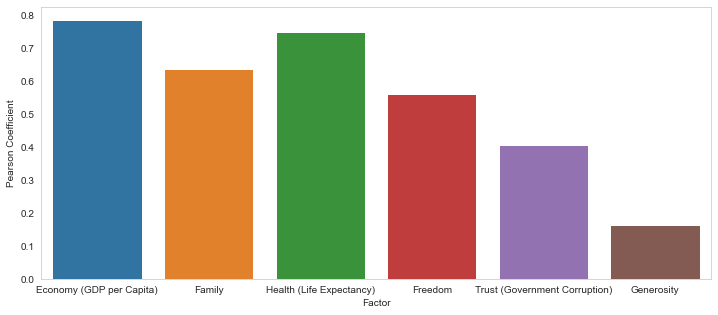

In [10]:
#your solution
plt.figure(figsize=(12,5))
sns.barplot(x='factor', y='pearson_coef', data=d)
plt.ylabel('Pearson Coefficient')
plt.xlabel('Factor')

d) You are to shortlist a question you wish to investigate (and not already covered above) using the data given.
Based on what you have learnt thus far, perform relevant EDA to help answer your question.
Hence, state your observations/conclusion.

<AxesSubplot:xlabel='Freedom', ylabel='Economy (GDP per Capita)'>

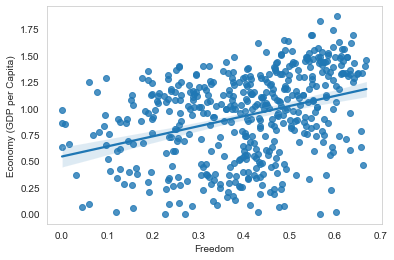

In [11]:
#your solution
# How is the economy affected by freedom
sns.regplot(x='Freedom', y='Economy (GDP per Capita)', data=data)

    It can be seen that there is a correleation between freedom and economy. As freedom increases, economy also seems to increase


e) We discussed the pairplot in the notes. In contrast to the `sns.pairplot` function, `sns.PairGrid` is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid. 

Read more about PairGrid and how to use it: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

Plot a relevant PairGrid to visualize the data in this question.

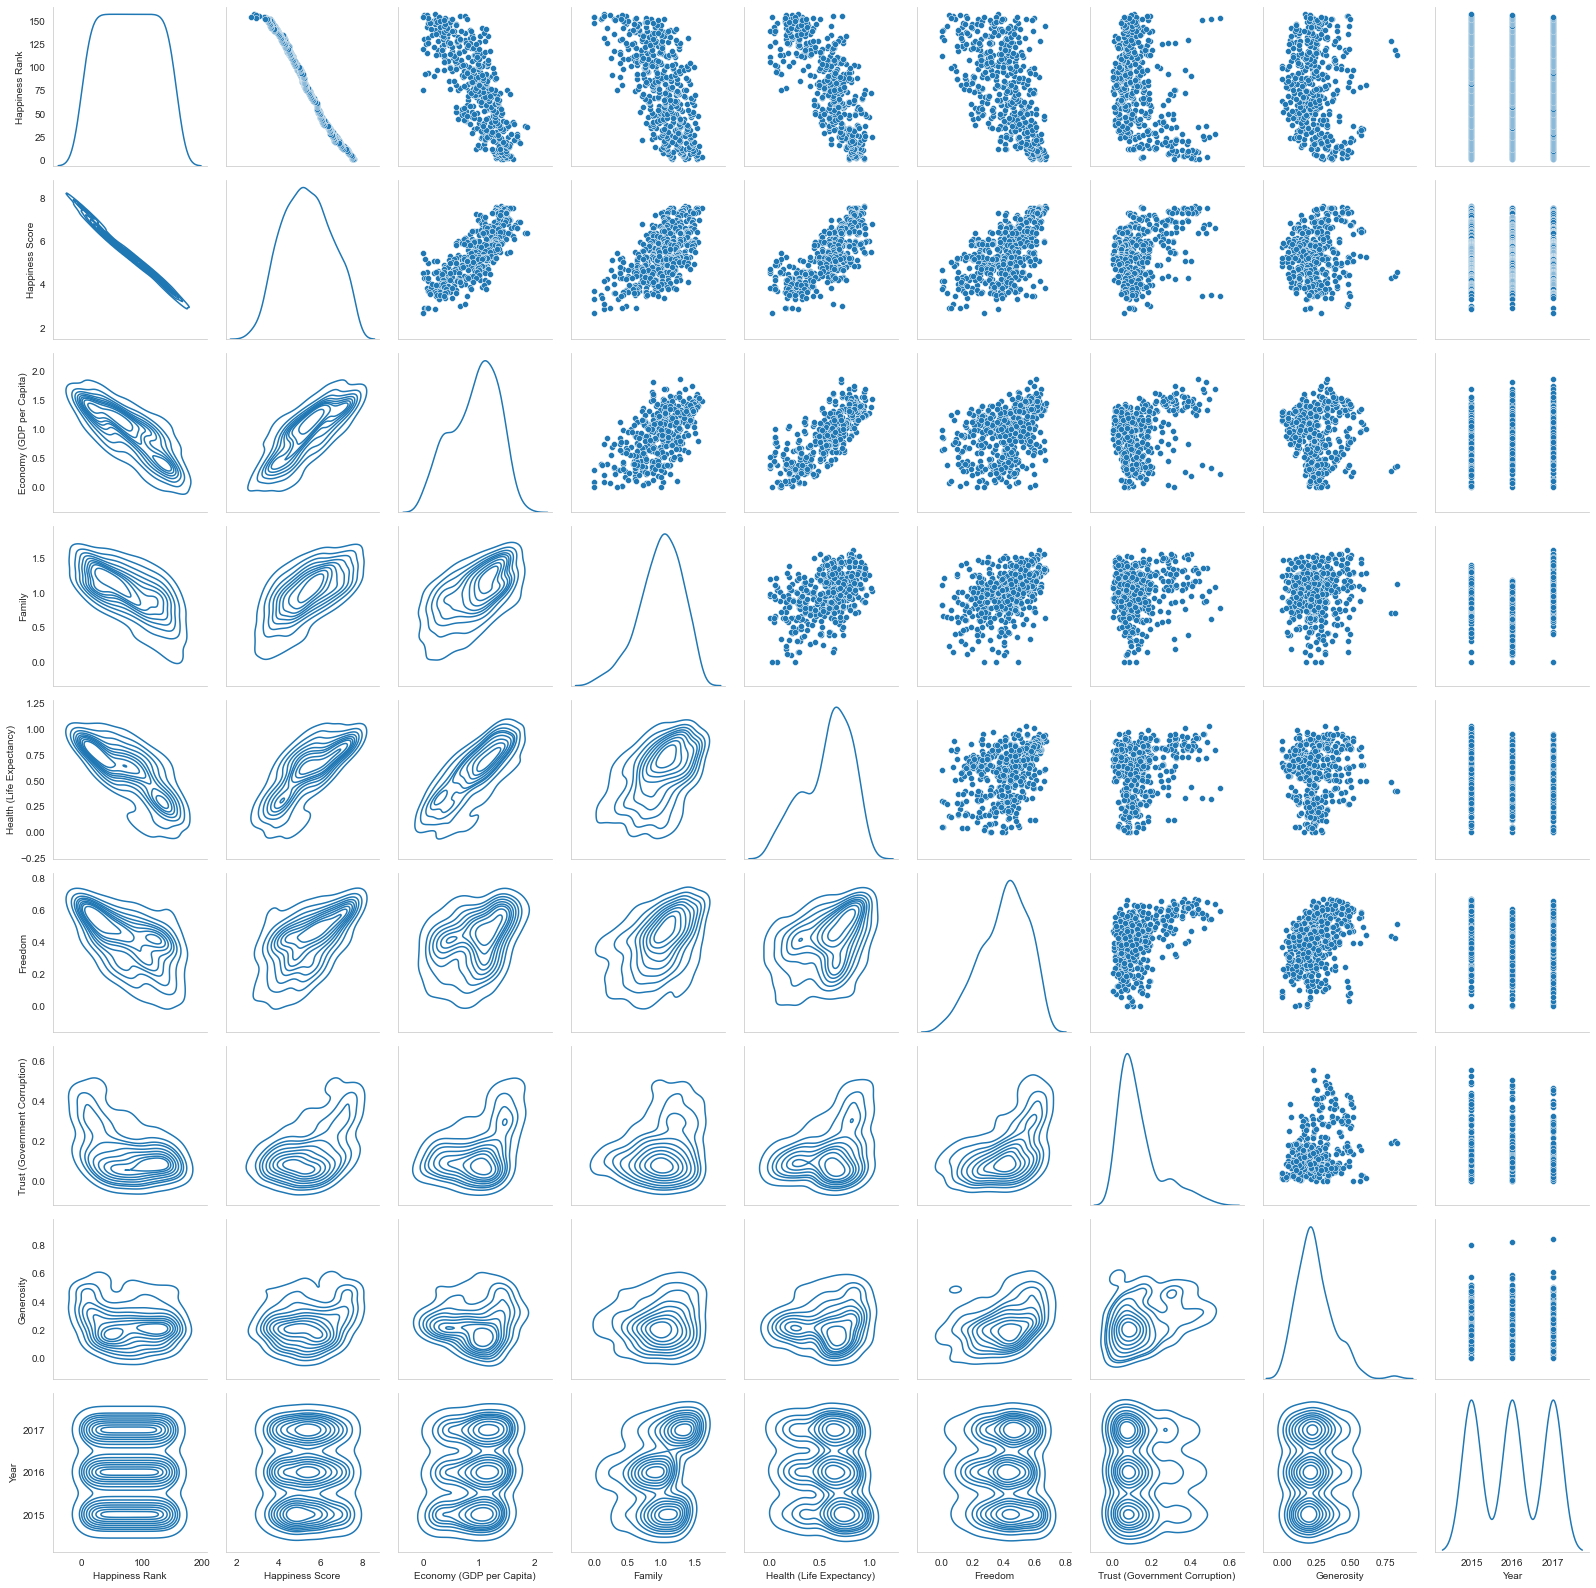

In [12]:
#your solution
g = sns.PairGrid(data, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

Do some customization to the PairGrid such that the diagonal will display the respective 5-number summary instead of the histogram.

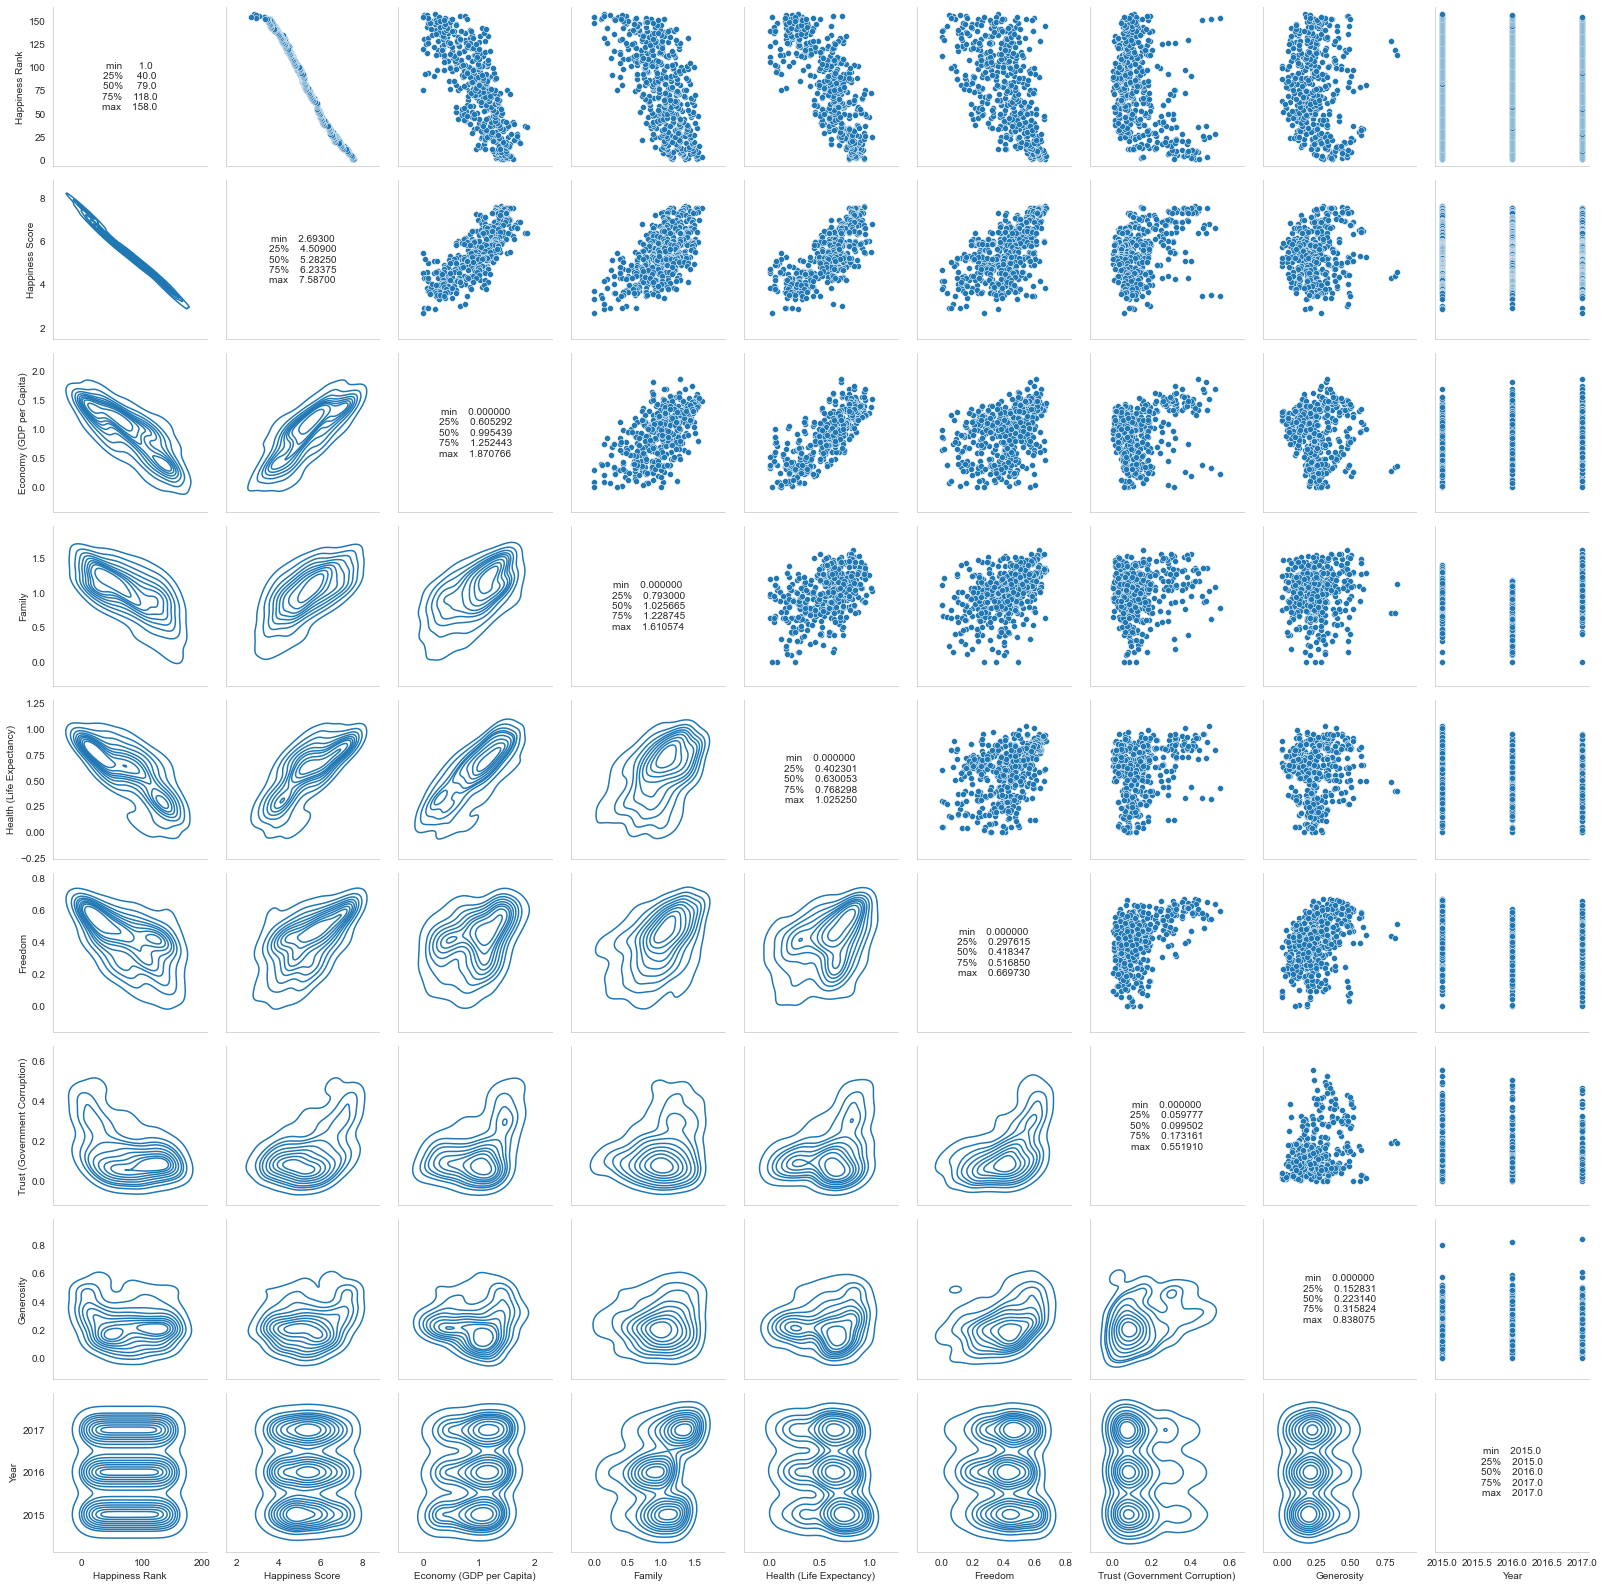

In [20]:
#your solution
def print_stats(data, **kwargs):
    data = pd.Series(data)
    ax = plt.gca()
    ax.annotate(data.describe()[-5:].to_string(), xy=(0.5,0.5), xycoords='axes fraction', ha='center', va='center')
g = sns.PairGrid(data, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(print_stats)

f) There is another class called the `sns.FacetGrid` which maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. 

Read more about FacetGrid and how to use it: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Plot a relevant FacetGrid to visualize the relationship between Happiness Score and GDP by Region (row) and Year (Column).

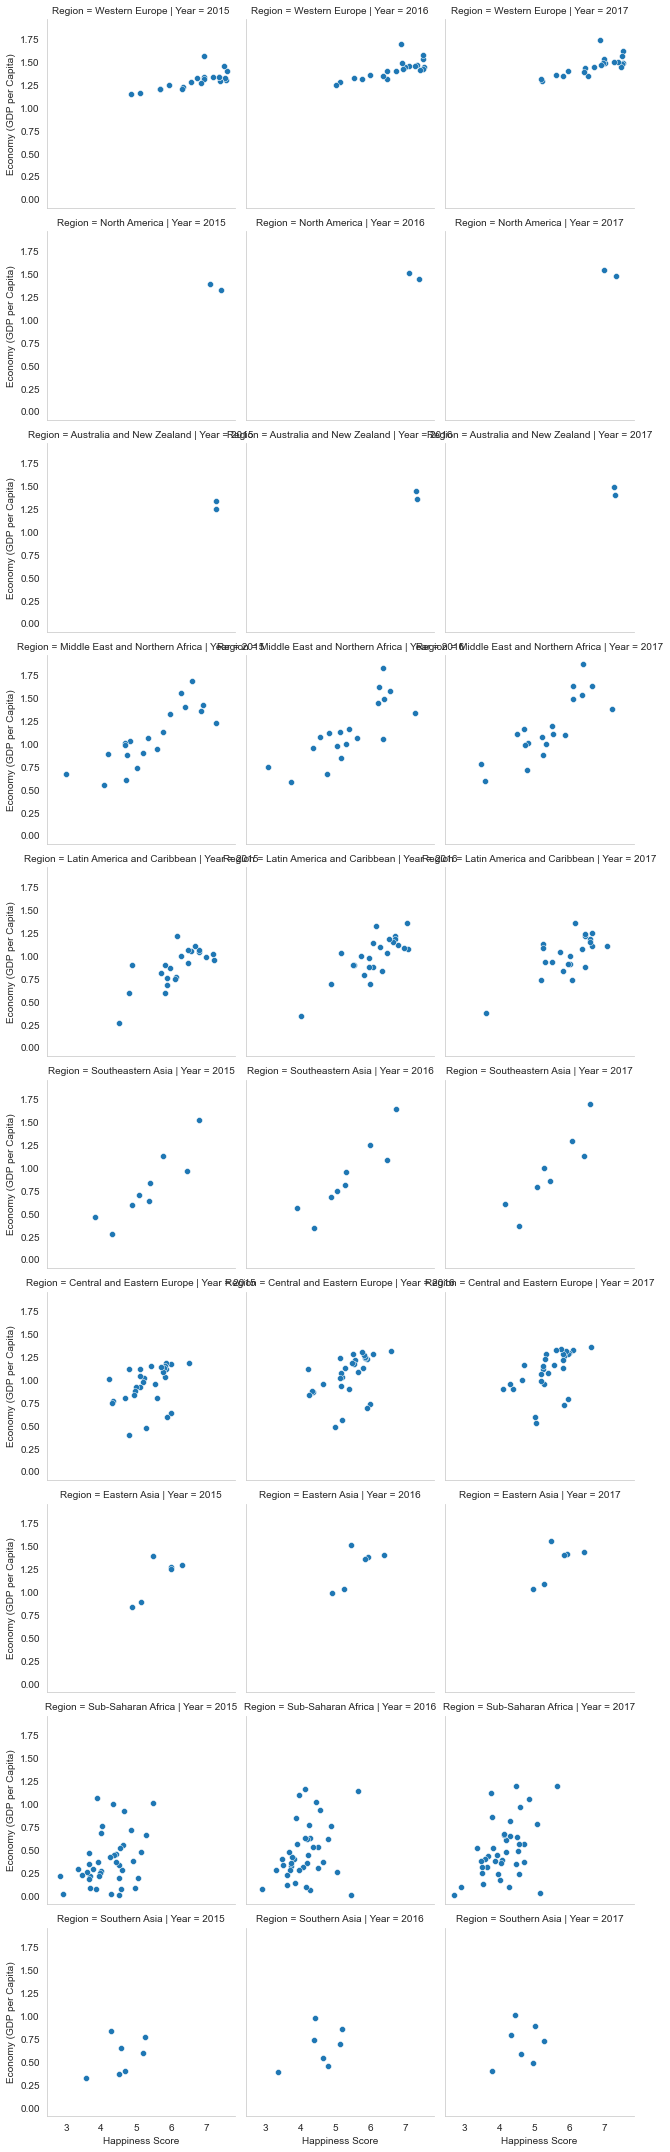

In [14]:
#your solution
g = sns.FacetGrid(data, row='Region', col='Year')
g.map_dataframe(sns.scatterplot, x="Happiness Score", y='Economy (GDP per Capita)')

Hence, state the differences between pairplot, PairGrid and FacetGrid.

    Pairplot is the least customisable among the three. PairGrid is a pairplot, but is 
    more customisable on which functions to use for plotting. FacetFrid is a plot which 
    allow plots to be separated using 2 variables.


## Q3

In this question, we will explore the basics of time series analysis via the following tutorial:<br>
https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

a) First, what is your understanding of a time series?

    They are graph that show a series of points over time


We will use the dataset below for this lab.

The data below shows the keyword search on the terms 'diet', 'gym' and 'finance' on Google vary over time.

In [15]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
df = pd.read_csv('Lab7iiQ3.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-02,75,26,49
1,2004-03,67,24,47
2,2004-04,70,22,48
3,2004-05,72,22,43
4,2004-06,64,24,45


b) Without making any changes to the dataframe, try to plot a trend graph for the data using the lineplot function in seaborn. Note that the 3 lines should be displayed in the same graph. The y-axis will be the frequency, and x-axis will be the months.

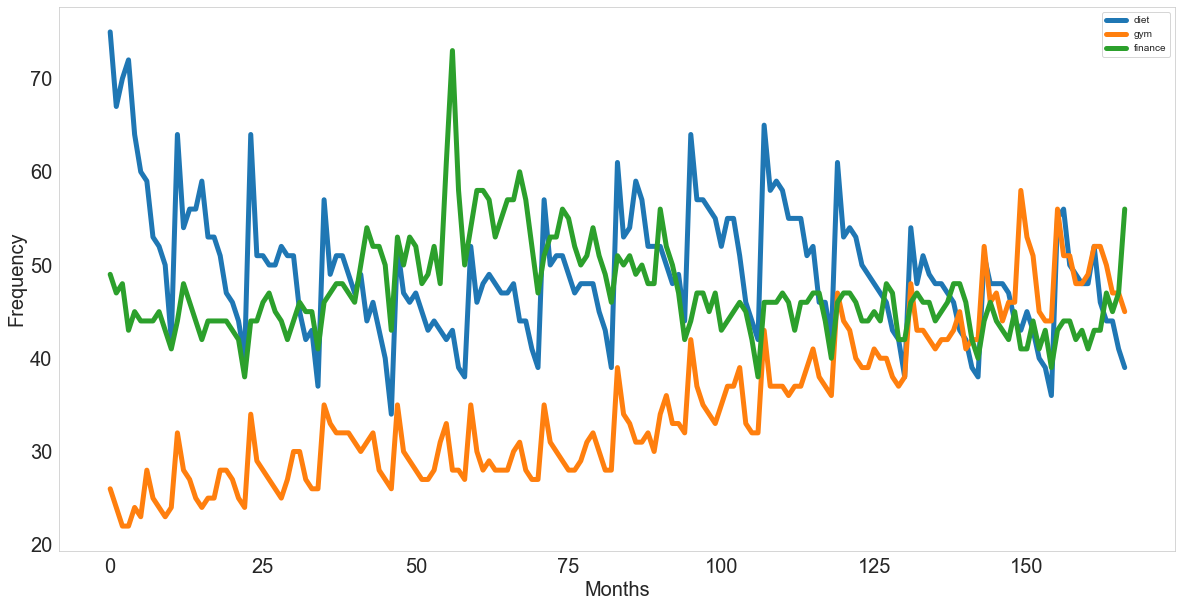

In [16]:
#your solution
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Frequency', fontsize=20);

What do you notice about the x-axis of your plot?

    The months are shown as integers from 0 to 150


c) Now, follow the tutorial and update month into a datetime attribute. Next, reindex the df such that month is the index. Display the df.

In [17]:
#your solution
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df

,diet,gym,finance
month,,,
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43
2004-06-01,64,24,45
...,...,...,...
2017-08-01,46,52,43
2017-09-01,44,50,47
2017-10-01,44,47,45


d) Now, plot a new trend graph using the dataframe from c) using the matplotlib `plot` function.

Text(0, 0.5, 'Frequency')

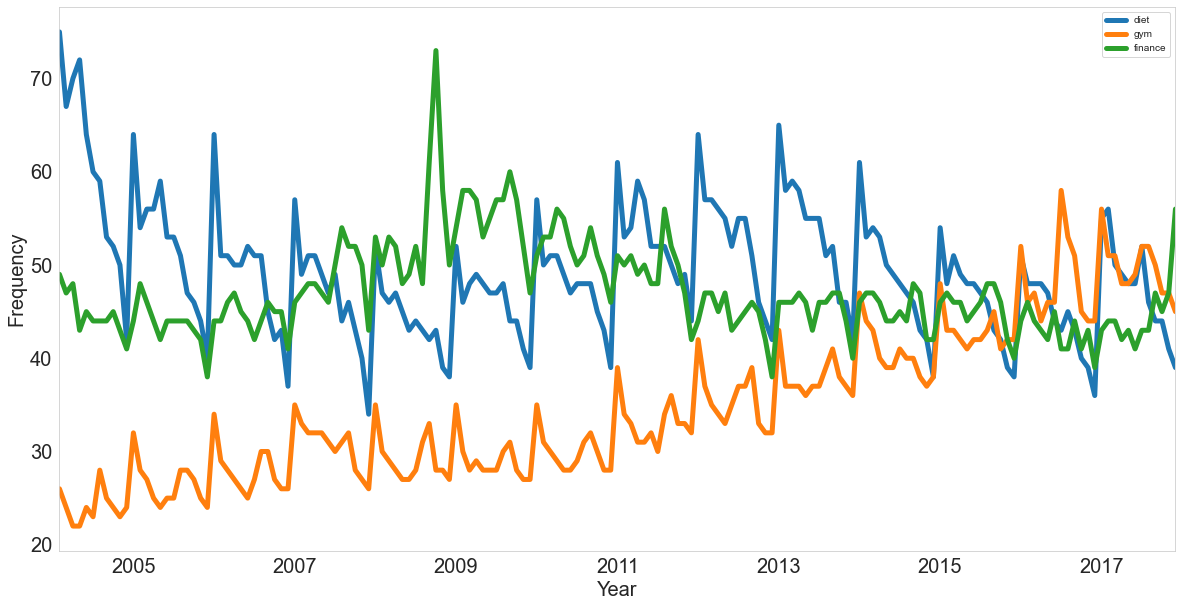

In [18]:
#your solution
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

Compare the differences between the graph from (a) and (c).

    The x-axis shows the years instead of integers


e) We would now like to identify trends in the time series for the 3 searches. One popular way is by rolling average. Plot a respective trend graph using rolling average method for each of the 3 searches in a single plot.

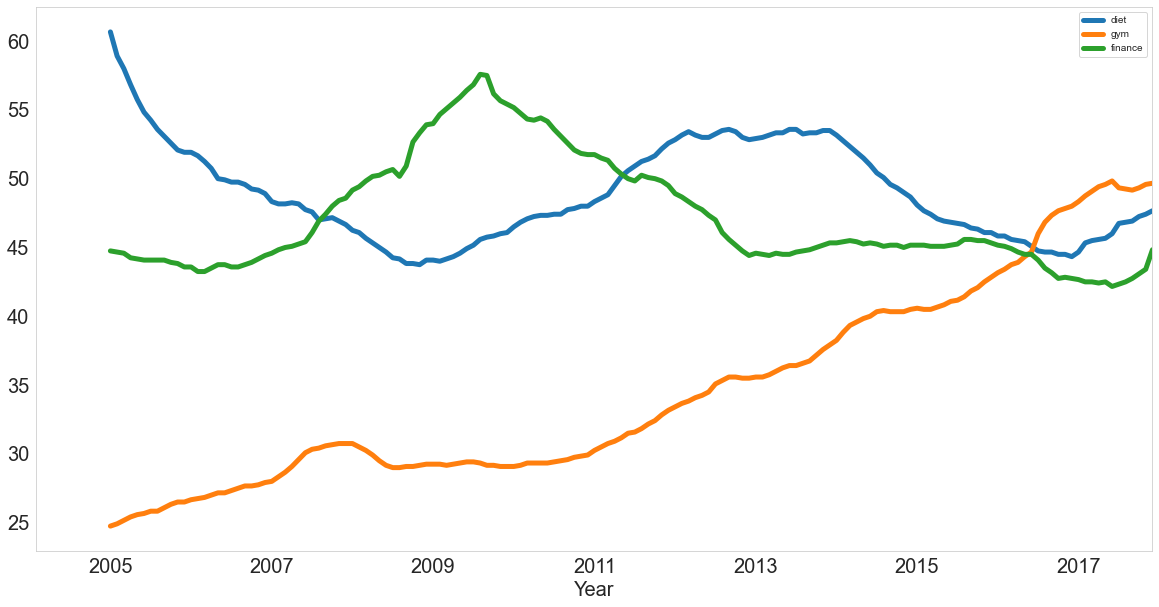

In [19]:
#your solution
df.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Key in your observations for each graph.

    Gym was relatively the lowest search term in 2005, but it has an increasing trends, and has overtaken finance and diet to have the highest relative searches. The relative searches of diet has decreased from 2005 to 2008, increased from 2009 to 2013, and has decreased again from 2013 to 2016. It has started to increase again in 2017. The relative searches of finance has increased from 2005 to 2009, decreased from 2009 to 2017, and is starting to increase again in 2017.


Hence, summarize your understanding of using rolling average to identify trends in time series below.

    Rolling average is the idea of having a moving mean, where the first element is excluded and another element after the last is included. This will thus allow us to see the general trend over a time, and it allows us to easily see the trend as there is less volitility.

<i>[Optional Exercise] You may complete the tutorial to understand what is Differencing, Periodicity and Autocorrelation.
You may show your plots and jot down your observations in the codeboxes below.</i>